In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import gzip
import os
import pandas as pd



In [12]:
# don't remove this snippet, if you didn't have gpu it will automatically run on cpu
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

        logical_gpus = tf.config.list_logical_devices('GPU')
        print("physical GPU detected.")

    except RuntimeError as e:
        print(e)
else:
    print("error")

physical GPU detected.


data loaded.
training shape: (60000, 28, 28, 1), labels: (60000, 10)
test shape: (10000, 28, 28, 1), labels: (10000, 10)


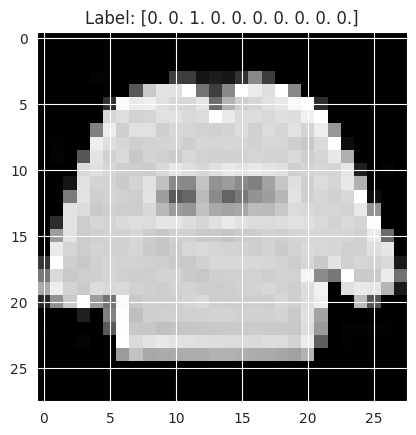

In [13]:
train_df = pd.read_csv('data/fashion-mnist_train.csv')
test_df = pd.read_csv('data/fashion-mnist_test.csv')

y_train = train_df['label'].values
y_test = test_df['label'].values

x_train = train_df.drop('label', axis=1).values
x_test = test_df.drop('label', axis=1).values

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


train_filename = 'fashion-mnist_train.csv'
test_filename = 'fashion-mnist_test.csv'


X_train = x_train.astype('float32') / 255.0
X_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("data loaded.")
print(f"training shape: {X_train.shape}, labels: {y_train.shape}")
print(f"test shape: {X_test.shape}, labels: {y_test.shape}")

#plotting the first image
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)